## 라이브러리 import

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [16]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [18]:
inputdata = pd.read_csv('./input-test1.csv',skiprows = 6, sep=',')
inputdata

,Name,P1,P2,P3,P4,P5,P6,P7,P8,P10
0,DP 0,80,120.0,110.0,100.0,98.0,85.0,80.0,80.0,0.002414
1,DP 1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6,0.002639
2,DP 2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8,0.002597
3,DP 3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6,0.002549
4,DP 4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8,0.002536
...,...,...,...,...,...,...,...,...,...,...
96,DP 96,80,118.2,108.2,116.6,117.0,106.2,94.6,82.6,0.002395
97,DP 97,80,118.6,109.8,80.6,109.8,107.0,99.4,94.2,0.002536
98,DP 98,80,119.0,104.6,109.8,111.0,89.4,93.0,97.0,0.002611
99,DP 99,80,119.4,80.6,100.2,119.4,109.8,109.4,89.8,0.002535


In [19]:
for i in range (100):
    temp_data = pd.read_csv('./test1/dp%d-preform-temp.csv'%(i+1),skiprows = 4, sep=',')
    s = "temp_dp%d = temp_data"%(i+1)
    exec(s)

# training, label 분리

In [20]:
temp_dp100

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ K ]
0,0.000000,389.750000
1,0.002953,389.750000
2,0.005916,389.750000
3,0.008878,389.750000
4,0.011840,389.750000
...,...,...
32,0.093458,392.513092
33,0.096063,384.500000
34,0.098668,374.220978
35,0.101273,363.863098


In [21]:
TrainData_ = np.zeros((100,37))
for i in range (100):
    exec("TrainData_[i,:] = temp_dp%d.iloc[:,1]"%(i+1))

In [22]:
TrainData = pd.DataFrame(TrainData_)
TrainData

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.657806,373.540253,...,377.957092,378.389252,374.274780,367.468018,360.661255,354.408600,353.307526,353.255890,353.203827,353.149994
1,354.950012,354.950012,354.950012,354.950012,354.950012,354.950012,354.949982,354.950012,358.591217,363.235382,...,361.841492,358.276031,356.407104,355.542755,354.678406,353.884430,353.622620,353.467651,353.311493,353.149994
2,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.703918,371.645111,...,374.806030,369.079712,364.778473,361.321045,357.863647,354.687683,353.937683,353.679413,353.419159,353.149994
3,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.489075,363.901215,...,373.390411,378.900635,376.471191,369.340302,362.209381,355.658997,354.252747,353.891174,353.526825,353.149994
4,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,366.413361,364.708527,...,366.850708,360.800262,357.939240,356.966858,355.994476,355.101227,354.567841,354.102966,353.634521,353.149994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,357.132751,358.896362,...,384.462769,382.193848,383.046509,385.747620,388.448730,390.929901,383.239716,373.373932,363.432404,353.150024
96,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.949188,368.713409,...,372.129425,380.016632,384.442932,386.819885,389.196869,391.380310,383.554779,373.585693,363.540070,353.150024
97,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,369.689087,369.101227,...,379.676941,378.272400,380.192993,384.082550,387.972137,391.545074,383.869873,373.797455,363.647736,353.150024
98,362.950012,362.950012,362.950012,362.950012,362.950012,362.950012,362.949982,362.950012,365.208466,368.089050,...,361.013123,355.718994,360.332489,370.812744,381.292999,390.920074,384.184937,374.009216,363.755432,353.150024


In [23]:
TrainLabel_ = inputdata.iloc[1:,9]


In [24]:
pd.set_option('display.max_rows',10)
TrainData

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.657806,373.540253,...,377.957092,378.389252,374.274780,367.468018,360.661255,354.408600,353.307526,353.255890,353.203827,353.149994
1,354.950012,354.950012,354.950012,354.950012,354.950012,354.950012,354.949982,354.950012,358.591217,363.235382,...,361.841492,358.276031,356.407104,355.542755,354.678406,353.884430,353.622620,353.467651,353.311493,353.149994
2,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.703918,371.645111,...,374.806030,369.079712,364.778473,361.321045,357.863647,354.687683,353.937683,353.679413,353.419159,353.149994
3,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.489075,363.901215,...,373.390411,378.900635,376.471191,369.340302,362.209381,355.658997,354.252747,353.891174,353.526825,353.149994
4,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,366.413361,364.708527,...,366.850708,360.800262,357.939240,356.966858,355.994476,355.101227,354.567841,354.102966,353.634521,353.149994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,355.750000,357.132751,358.896362,...,384.462769,382.193848,383.046509,385.747620,388.448730,390.929901,383.239716,373.373932,363.432404,353.150024
96,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.350006,367.949188,368.713409,...,372.129425,380.016632,384.442932,386.819885,389.196869,391.380310,383.554779,373.585693,363.540070,353.150024
97,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,370.149994,369.689087,369.101227,...,379.676941,378.272400,380.192993,384.082550,387.972137,391.545074,383.869873,373.797455,363.647736,353.150024
98,362.950012,362.950012,362.950012,362.950012,362.950012,362.950012,362.949982,362.950012,365.208466,368.089050,...,361.013123,355.718994,360.332489,370.812744,381.292999,390.920074,384.184937,374.009216,363.755432,353.150024


In [25]:
pd.DataFrame(TrainLabel_)

,P10
1,0.002639
2,0.002597
3,0.002549
4,0.002536
5,0.002529
...,...
96,0.002395
97,0.002536
98,0.002611
99,0.002535


In [26]:
pd.DataFrame(TrainLabel_).describe()

,P10
count,100.000000
mean,0.002615
std,0.000085
min,0.002395
25%,0.002551
50%,0.002612
75%,0.002691
max,0.002751


In [27]:
max_value = np.max(TrainLabel_)
min_value = np.min(TrainLabel_)

dist_value = max_value - min_value

TrainLabel = pd.DataFrame(((TrainLabel_ - min_value)/dist_value)+0.5)

In [28]:
pd.set_option("Display.max_rows",10)
pd.DataFrame(TrainLabel)

,P10
1,1.184604
2,1.068196
3,0.931607
4,0.897109
5,0.875775
...,...
96,0.500000
97,0.896182
98,1.106091
99,0.894975


## ANN hyperparameter 조절에 따른 학습성능 확인 

#### 지정 iteration마다 학습과정 확인 함수(Class) 정의

In [29]:
EpochForPrint = 100

class AccuracyPerEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keras.callbacks.Callback()
        if epoch%EpochForPrint == 0:
            print("[{} Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                  .format(epoch, np.sqrt(logs['mse']), logs['mae'], logs['mape']))

#### Hyperparameter 조합 설정

In [30]:
# 조정 하이퍼파라미터 : 학습율, 은닉층 뉴런 수
Lr = [0.001, 0.005, 0.01]   # Learning Rates
N1 = [30, 40, 50, 60, 70]   # Number of Neurons on Hidden Layer 1
N2 = [10, 20, 30]           # Number of Neurons on Hidden Layer 2

Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1
Epoch          = 5000

print('Number of case : %d'%(len(Lr)*len(N1)*len(N2)))

Number of case : 45


### 모델 학습 1 - FFT 특징 기반 Wn1, Wn2, R1, R2 예측

In [24]:
for M in range(1):
    
    Tr_result_temp = np.zeros((len(Lr)*len(N1)*len(N2) , 7)) # *len(N2)
    cnt = 0
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    print('\n\n\n\n################## Model %d (Predict :'%(M+1) + Model[M] + ') ##################')

    for i in range(len(Lr)):
        learningRate = Lr[i]

        for j in range(len(N1)):
            noOfNeuron1 = N1[j]
            
            for k in range(len(N2)):
                noOfNeuron2 = N2[k]

                print('\n\nTrial No.%d'%(cnt+1))
                print('Prediction :' + Model[M])
                print('Learning rate : {:.3}'.format(learningRate))
                print('Hidden 1 neuron : %d'%(noOfNeuron1))
                print('Hidden 2 neuron : %d'%(noOfNeuron2))

                ################ 신경망 구조 재설계 ################

                tf.keras.backend.clear_session()
                def ANN_model(input_data):
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(units = noOfNeuron_in,
                                                 input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
                    model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
                    model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
                    model.add(keras.layers.Dense(units = noOfNeuron_out,             )) # Output Layer
                    model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                                  loss=keras.losses.mean_absolute_error,
                                  metrics=['mse','mae','mape'])
                    return model
                model = ANN_model(TrainData)

                ################ 신경망 학습 ################

                hist = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
                print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                      .format(np.sqrt(hist.history['mse'][-1]), hist.history['mae'][-1], hist.history['mape'][-1]))
                
                model.save('D:/testoneblow/MLmodels/Model_%d.h5'%(cnt+1))
                
                Tr_result_temp[cnt,0] = cnt+1
                Tr_result_temp[cnt,1] = learningRate
                Tr_result_temp[cnt,2] = noOfNeuron1
                Tr_result_temp[cnt,3] = noOfNeuron2
                Tr_result_temp[cnt,4] = np.sqrt(hist.history['mse'][-1])
                Tr_result_temp[cnt,5] = hist.history['mae'][-1]
                Tr_result_temp[cnt,6] = hist.history['mape'][-1]

                cnt=cnt+1


    Tr_result_temp_pd = pd.DataFrame(Tr_result_temp, columns=['Case', 'L.rate', 'Nr-HL1', 'Nr-HL2', 'RMSE', 'MAE', 'MAPE'])
    Tr_result_temp_pd.to_csv('D:/testoneblow/ANN_prediction5.0/Tr_result_epoch%d.csv'%(Epoch), index=None)





################## Model 1 (Predict :thickness) ##################


Trial No.1
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 30
Hidden 2 neuron : 10
[0 Epochs]    RMSE:371.65851,   MAE: 371.55945,  MAPE: 35198.29%
[100 Epochs]    RMSE:3.87188,   MAE: 3.17100,  MAPE: 313.41%
[200 Epochs]    RMSE:2.19916,   MAE: 1.70945,  MAPE: 163.51%
[300 Epochs]    RMSE:1.55199,   MAE: 1.21022,  MAPE: 116.42%
[400 Epochs]    RMSE:1.90073,   MAE: 1.67766,  MAPE: 160.75%
[500 Epochs]    RMSE:2.18001,   MAE: 1.96019,  MAPE: 194.40%
[600 Epochs]    RMSE:1.84949,   MAE: 1.66269,  MAPE: 165.10%
[700 Epochs]    RMSE:1.55971,   MAE: 1.40632,  MAPE: 138.83%
[800 Epochs]    RMSE:1.58495,   MAE: 1.47276,  MAPE: 142.93%
[900 Epochs]    RMSE:1.38897,   MAE: 1.29462,  MAPE: 126.61%
[1000 Epochs]    RMSE:1.22834,   MAE: 1.15812,  MAPE: 111.78%
[1100 Epochs]    RMSE:0.91920,   MAE: 0.84121,  MAPE: 80.98%
[1200 Epochs]    RMSE:1.02823,   MAE: 0.97269,  MAPE: 92.43%
[1300 Epochs]    RMSE:0.91377,  

[2800 Epochs]    RMSE:0.26559,   MAE: 0.24173,  MAPE: 21.69%
[2900 Epochs]    RMSE:0.17710,   MAE: 0.14703,  MAPE: 13.27%
[3000 Epochs]    RMSE:0.14369,   MAE: 0.11880,  MAPE: 12.32%
[3100 Epochs]    RMSE:0.11252,   MAE: 0.08150,  MAPE: 8.10%
[3200 Epochs]    RMSE:0.19839,   MAE: 0.16981,  MAPE: 17.63%
[3300 Epochs]    RMSE:0.15344,   MAE: 0.12737,  MAPE: 13.43%
[3400 Epochs]    RMSE:0.14651,   MAE: 0.12287,  MAPE: 12.86%
[3500 Epochs]    RMSE:0.15559,   MAE: 0.12978,  MAPE: 13.57%
[3600 Epochs]    RMSE:0.11310,   MAE: 0.08167,  MAPE: 8.40%
[3700 Epochs]    RMSE:0.11225,   MAE: 0.08040,  MAPE: 8.28%
[3800 Epochs]    RMSE:0.10885,   MAE: 0.07831,  MAPE: 8.03%
[3900 Epochs]    RMSE:0.21805,   MAE: 0.19184,  MAPE: 19.76%
[4000 Epochs]    RMSE:0.10924,   MAE: 0.07543,  MAPE: 7.53%
[4100 Epochs]    RMSE:0.11430,   MAE: 0.08019,  MAPE: 7.70%
[4200 Epochs]    RMSE:0.10907,   MAE: 0.07453,  MAPE: 7.44%
[4300 Epochs]    RMSE:0.14304,   MAE: 0.11043,  MAPE: 10.02%
[4400 Epochs]    RMSE:0.14423, 

[600 Epochs]    RMSE:1.28440,   MAE: 1.05534,  MAPE: 98.99%
[700 Epochs]    RMSE:1.39122,   MAE: 1.19427,  MAPE: 111.84%
[800 Epochs]    RMSE:1.29223,   MAE: 1.11230,  MAPE: 103.65%
[900 Epochs]    RMSE:0.79960,   MAE: 0.62878,  MAPE: 58.24%
[1000 Epochs]    RMSE:0.51218,   MAE: 0.40040,  MAPE: 36.33%
[1100 Epochs]    RMSE:0.59629,   MAE: 0.50980,  MAPE: 48.84%
[1200 Epochs]    RMSE:1.32445,   MAE: 1.25076,  MAPE: 116.96%
[1300 Epochs]    RMSE:0.88407,   MAE: 0.78276,  MAPE: 72.41%
[1400 Epochs]    RMSE:0.82868,   MAE: 0.73478,  MAPE: 68.64%
[1500 Epochs]    RMSE:0.70174,   MAE: 0.62055,  MAPE: 57.88%
[1600 Epochs]    RMSE:0.67744,   MAE: 0.59685,  MAPE: 54.99%
[1700 Epochs]    RMSE:0.41045,   MAE: 0.35187,  MAPE: 33.27%
[1800 Epochs]    RMSE:0.64186,   MAE: 0.57592,  MAPE: 54.48%
[1900 Epochs]    RMSE:0.27972,   MAE: 0.23781,  MAPE: 23.03%
[2000 Epochs]    RMSE:0.65147,   MAE: 0.59888,  MAPE: 55.86%
[2100 Epochs]    RMSE:0.26130,   MAE: 0.21727,  MAPE: 21.33%
[2200 Epochs]    RMSE:0.6

[3600 Epochs]    RMSE:0.11467,   MAE: 0.09192,  MAPE: 9.02%
[3700 Epochs]    RMSE:0.10797,   MAE: 0.08097,  MAPE: 7.68%
[3800 Epochs]    RMSE:0.14011,   MAE: 0.11816,  MAPE: 11.91%
[3900 Epochs]    RMSE:0.14673,   MAE: 0.12567,  MAPE: 12.68%
[4000 Epochs]    RMSE:0.12372,   MAE: 0.10014,  MAPE: 10.23%
[4100 Epochs]    RMSE:0.10756,   MAE: 0.07603,  MAPE: 7.16%
[4200 Epochs]    RMSE:0.11056,   MAE: 0.08512,  MAPE: 8.43%
[4300 Epochs]    RMSE:0.10903,   MAE: 0.07679,  MAPE: 7.16%
[4400 Epochs]    RMSE:0.11448,   MAE: 0.09074,  MAPE: 9.10%
[4500 Epochs]    RMSE:0.22920,   MAE: 0.21240,  MAPE: 21.11%
[4600 Epochs]    RMSE:0.32607,   MAE: 0.31099,  MAPE: 30.60%
[4700 Epochs]    RMSE:0.13258,   MAE: 0.09402,  MAPE: 8.32%
[4800 Epochs]    RMSE:0.10940,   MAE: 0.07232,  MAPE: 6.64%
[4900 Epochs]    RMSE:0.12959,   MAE: 0.10974,  MAPE: 10.83%

[Final Epochs]    RMSE:0.22248,   MAE: 0.20510,  MAPE: 20.77%


Trial No.9
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 50
Hidden 2 neur

[1400 Epochs]    RMSE:0.38932,   MAE: 0.34636,  MAPE: 30.10%
[1500 Epochs]    RMSE:0.34613,   MAE: 0.30500,  MAPE: 26.38%
[1600 Epochs]    RMSE:0.46293,   MAE: 0.42410,  MAPE: 36.74%
[1700 Epochs]    RMSE:0.38519,   MAE: 0.34443,  MAPE: 29.47%
[1800 Epochs]    RMSE:0.38668,   MAE: 0.34619,  MAPE: 29.53%
[1900 Epochs]    RMSE:0.33961,   MAE: 0.30124,  MAPE: 25.69%
[2000 Epochs]    RMSE:0.37140,   MAE: 0.33289,  MAPE: 28.27%
[2100 Epochs]    RMSE:0.41300,   MAE: 0.38037,  MAPE: 32.84%
[2200 Epochs]    RMSE:0.19727,   MAE: 0.16144,  MAPE: 16.66%
[2300 Epochs]    RMSE:0.14672,   MAE: 0.10976,  MAPE: 10.78%
[2400 Epochs]    RMSE:0.50507,   MAE: 0.48811,  MAPE: 44.13%
[2500 Epochs]    RMSE:0.32829,   MAE: 0.30441,  MAPE: 26.58%
[2600 Epochs]    RMSE:0.30856,   MAE: 0.28281,  MAPE: 24.52%
[2700 Epochs]    RMSE:0.31876,   MAE: 0.29341,  MAPE: 25.47%
[2800 Epochs]    RMSE:0.26760,   MAE: 0.24024,  MAPE: 20.66%
[2900 Epochs]    RMSE:0.26378,   MAE: 0.23522,  MAPE: 20.08%
[3000 Epochs]    RMSE:0.

[4400 Epochs]    RMSE:0.30237,   MAE: 0.26224,  MAPE: 23.62%
[4500 Epochs]    RMSE:0.26988,   MAE: 0.23262,  MAPE: 23.24%
[4600 Epochs]    RMSE:0.66739,   MAE: 0.64185,  MAPE: 63.09%
[4700 Epochs]    RMSE:1.17705,   MAE: 1.16195,  MAPE: 112.77%
[4800 Epochs]    RMSE:0.53456,   MAE: 0.47969,  MAPE: 41.64%
[4900 Epochs]    RMSE:0.71110,   MAE: 0.67319,  MAPE: 59.74%

[Final Epochs]    RMSE:0.57345,   MAE: 0.53461,  MAPE: 54.10%


Trial No.14
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 70
Hidden 2 neuron : 20
[0 Epochs]    RMSE:132.52301,   MAE: 132.47815,  MAPE: 12467.91%
[100 Epochs]    RMSE:2.33904,   MAE: 1.93761,  MAPE: 180.67%
[200 Epochs]    RMSE:1.48543,   MAE: 1.18037,  MAPE: 111.89%
[300 Epochs]    RMSE:1.46215,   MAE: 1.24350,  MAPE: 117.14%
[400 Epochs]    RMSE:1.23322,   MAE: 1.06585,  MAPE: 99.54%
[500 Epochs]    RMSE:1.16390,   MAE: 1.05381,  MAPE: 99.75%
[600 Epochs]    RMSE:3.27541,   MAE: 3.23096,  MAPE: 306.54%
[700 Epochs]    RMSE:1.43943,   MAE: 1.32

[2200 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[2300 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[2400 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[2500 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[2600 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[2700 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[2800 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[2900 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[3000 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[3100 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[3200 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[3300 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[3400 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[3500 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[3600 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[3700 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.41%
[3800 Epochs]    RMSE:0.

[0 Epochs]    RMSE:166.61038,   MAE: 166.54617,  MAPE: 15761.48%
[100 Epochs]    RMSE:0.22133,   MAE: 0.17800,  MAPE: 19.25%
[200 Epochs]    RMSE:0.18553,   MAE: 0.14959,  MAPE: 15.96%
[300 Epochs]    RMSE:0.18192,   MAE: 0.13901,  MAPE: 15.51%
[400 Epochs]    RMSE:0.24403,   MAE: 0.20028,  MAPE: 21.86%
[500 Epochs]    RMSE:0.21087,   MAE: 0.18666,  MAPE: 16.51%
[600 Epochs]    RMSE:0.16987,   MAE: 0.14649,  MAPE: 13.63%
[700 Epochs]    RMSE:0.20046,   MAE: 0.14611,  MAPE: 16.98%
[800 Epochs]    RMSE:0.33807,   MAE: 0.30024,  MAPE: 31.93%
[900 Epochs]    RMSE:0.12820,   MAE: 0.10006,  MAPE: 9.71%
[1000 Epochs]    RMSE:0.13794,   MAE: 0.10792,  MAPE: 9.89%
[1100 Epochs]    RMSE:0.12773,   MAE: 0.09814,  MAPE: 9.18%
[1200 Epochs]    RMSE:0.11104,   MAE: 0.08401,  MAPE: 8.43%
[1300 Epochs]    RMSE:0.12360,   MAE: 0.09790,  MAPE: 10.31%
[1400 Epochs]    RMSE:0.11910,   MAE: 0.09300,  MAPE: 9.86%
[1500 Epochs]    RMSE:0.12944,   MAE: 0.09821,  MAPE: 8.97%
[1600 Epochs]    RMSE:0.11288,   MA

[3200 Epochs]    RMSE:0.11471,   MAE: 0.09235,  MAPE: 8.52%
[3300 Epochs]    RMSE:0.10861,   MAE: 0.08167,  MAPE: 7.77%
[3400 Epochs]    RMSE:0.10549,   MAE: 0.08151,  MAPE: 8.21%
[3500 Epochs]    RMSE:0.13150,   MAE: 0.10522,  MAPE: 9.18%
[3600 Epochs]    RMSE:0.10936,   MAE: 0.08467,  MAPE: 8.50%
[3700 Epochs]    RMSE:0.12920,   MAE: 0.10699,  MAPE: 10.79%
[3800 Epochs]    RMSE:0.13066,   MAE: 0.10351,  MAPE: 10.67%
[3900 Epochs]    RMSE:0.12460,   MAE: 0.09921,  MAPE: 10.57%
[4000 Epochs]    RMSE:0.15827,   MAE: 0.12567,  MAPE: 11.48%
[4100 Epochs]    RMSE:0.12983,   MAE: 0.10060,  MAPE: 9.11%
[4200 Epochs]    RMSE:0.11443,   MAE: 0.08694,  MAPE: 7.77%
[4300 Epochs]    RMSE:0.10454,   MAE: 0.08008,  MAPE: 7.81%
[4400 Epochs]    RMSE:0.35219,   MAE: 0.30514,  MAPE: 25.58%
[4500 Epochs]    RMSE:0.17888,   MAE: 0.14076,  MAPE: 15.10%
[4600 Epochs]    RMSE:0.16401,   MAE: 0.13953,  MAPE: 13.73%
[4700 Epochs]    RMSE:0.15362,   MAE: 0.11180,  MAPE: 12.61%
[4800 Epochs]    RMSE:0.13930,  

[1000 Epochs]    RMSE:0.08760,   MAE: 0.06568,  MAPE: 6.17%
[1100 Epochs]    RMSE:0.09238,   MAE: 0.07193,  MAPE: 6.50%
[1200 Epochs]    RMSE:0.10180,   MAE: 0.07995,  MAPE: 7.87%
[1300 Epochs]    RMSE:0.27613,   MAE: 0.20532,  MAPE: 18.63%
[1400 Epochs]    RMSE:0.13737,   MAE: 0.11176,  MAPE: 11.21%
[1500 Epochs]    RMSE:0.09411,   MAE: 0.06895,  MAPE: 6.97%
[1600 Epochs]    RMSE:0.09847,   MAE: 0.07771,  MAPE: 7.82%
[1700 Epochs]    RMSE:0.08885,   MAE: 0.06566,  MAPE: 6.91%
[1800 Epochs]    RMSE:0.10694,   MAE: 0.08701,  MAPE: 8.32%
[1900 Epochs]    RMSE:0.08808,   MAE: 0.06433,  MAPE: 6.41%
[2000 Epochs]    RMSE:0.11006,   MAE: 0.08874,  MAPE: 8.45%
[2100 Epochs]    RMSE:0.10213,   MAE: 0.07976,  MAPE: 7.94%
[2200 Epochs]    RMSE:0.15663,   MAE: 0.13191,  MAPE: 11.34%
[2300 Epochs]    RMSE:0.11582,   MAE: 0.09333,  MAPE: 9.10%
[2400 Epochs]    RMSE:0.11171,   MAE: 0.08200,  MAPE: 8.50%
[2500 Epochs]    RMSE:0.25041,   MAE: 0.22711,  MAPE: 23.44%
[2600 Epochs]    RMSE:0.10748,   MAE

[4200 Epochs]    RMSE:0.12731,   MAE: 0.09244,  MAPE: 8.90%
[4300 Epochs]    RMSE:0.14273,   MAE: 0.10700,  MAPE: 9.85%
[4400 Epochs]    RMSE:0.11749,   MAE: 0.09040,  MAPE: 9.23%
[4500 Epochs]    RMSE:0.12023,   MAE: 0.09065,  MAPE: 8.68%
[4600 Epochs]    RMSE:0.11711,   MAE: 0.08765,  MAPE: 8.45%
[4700 Epochs]    RMSE:0.11640,   MAE: 0.08876,  MAPE: 8.93%
[4800 Epochs]    RMSE:0.11235,   MAE: 0.08370,  MAPE: 8.43%
[4900 Epochs]    RMSE:0.12983,   MAE: 0.10565,  MAPE: 9.73%

[Final Epochs]    RMSE:0.12663,   MAE: 0.08846,  MAPE: 8.50%


Trial No.27
Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 60
Hidden 2 neuron : 30
[0 Epochs]    RMSE:223.87353,   MAE: 223.81018,  MAPE: 21042.70%
[100 Epochs]    RMSE:1.50184,   MAE: 1.33022,  MAPE: 116.10%
[200 Epochs]    RMSE:6.64049,   MAE: 6.62994,  MAPE: 631.77%
[300 Epochs]    RMSE:0.38657,   MAE: 0.33860,  MAPE: 30.15%
[400 Epochs]    RMSE:0.49222,   MAE: 0.45334,  MAPE: 47.08%
[500 Epochs]    RMSE:0.21348,   MAE: 0.18153,  MAPE

[2000 Epochs]    RMSE:0.25761,   MAE: 0.21957,  MAPE: 22.40%
[2100 Epochs]    RMSE:0.09132,   MAE: 0.06970,  MAPE: 7.06%
[2200 Epochs]    RMSE:0.14717,   MAE: 0.12723,  MAPE: 11.44%
[2300 Epochs]    RMSE:0.08093,   MAE: 0.06153,  MAPE: 6.07%
[2400 Epochs]    RMSE:0.25171,   MAE: 0.21631,  MAPE: 22.38%
[2500 Epochs]    RMSE:0.11975,   MAE: 0.09213,  MAPE: 9.93%
[2600 Epochs]    RMSE:0.13428,   MAE: 0.10516,  MAPE: 9.99%
[2700 Epochs]    RMSE:0.11208,   MAE: 0.08750,  MAPE: 8.10%
[2800 Epochs]    RMSE:0.24230,   MAE: 0.20102,  MAPE: 21.28%
[2900 Epochs]    RMSE:0.12079,   MAE: 0.10008,  MAPE: 9.11%
[3000 Epochs]    RMSE:0.13095,   MAE: 0.10041,  MAPE: 11.10%
[3100 Epochs]    RMSE:0.13080,   MAE: 0.10616,  MAPE: 10.12%
[3200 Epochs]    RMSE:0.12856,   MAE: 0.10444,  MAPE: 10.73%
[3300 Epochs]    RMSE:0.11857,   MAE: 0.09009,  MAPE: 8.85%
[3400 Epochs]    RMSE:0.11983,   MAE: 0.09224,  MAPE: 9.41%
[3500 Epochs]    RMSE:2.53597,   MAE: 2.52433,  MAPE: 232.69%
[3600 Epochs]    RMSE:0.26252, 


[Final Epochs]    RMSE:0.11853,   MAE: 0.08235,  MAPE: 7.73%


Trial No.32
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 30
Hidden 2 neuron : 20
[0 Epochs]    RMSE:132.56979,   MAE: 132.48756,  MAPE: 12457.24%
[100 Epochs]    RMSE:0.25561,   MAE: 0.20375,  MAPE: 22.62%
[200 Epochs]    RMSE:0.43036,   MAE: 0.38737,  MAPE: 40.44%
[300 Epochs]    RMSE:0.22593,   MAE: 0.19327,  MAPE: 19.40%
[400 Epochs]    RMSE:0.20471,   MAE: 0.17242,  MAPE: 16.84%
[500 Epochs]    RMSE:0.17096,   MAE: 0.14413,  MAPE: 13.90%
[600 Epochs]    RMSE:0.14148,   MAE: 0.11794,  MAPE: 11.78%
[700 Epochs]    RMSE:0.14391,   MAE: 0.12055,  MAPE: 11.11%
[800 Epochs]    RMSE:0.14409,   MAE: 0.11663,  MAPE: 10.36%
[900 Epochs]    RMSE:0.16230,   MAE: 0.13697,  MAPE: 14.38%
[1000 Epochs]    RMSE:0.14889,   MAE: 0.11808,  MAPE: 10.25%
[1100 Epochs]    RMSE:0.15347,   MAE: 0.13068,  MAPE: 13.60%
[1200 Epochs]    RMSE:0.11028,   MAE: 0.08758,  MAPE: 8.73%
[1300 Epochs]    RMSE:0.15445,   MAE: 0.12631,  MAPE

[2800 Epochs]    RMSE:0.11458,   MAE: 0.08052,  MAPE: 7.62%
[2900 Epochs]    RMSE:0.10630,   MAE: 0.07543,  MAPE: 7.65%
[3000 Epochs]    RMSE:0.10973,   MAE: 0.07306,  MAPE: 7.18%
[3100 Epochs]    RMSE:0.11112,   MAE: 0.07449,  MAPE: 7.23%
[3200 Epochs]    RMSE:0.11473,   MAE: 0.07970,  MAPE: 7.56%
[3300 Epochs]    RMSE:0.11186,   MAE: 0.07338,  MAPE: 7.13%
[3400 Epochs]    RMSE:0.10979,   MAE: 0.08106,  MAPE: 8.19%
[3500 Epochs]    RMSE:0.11286,   MAE: 0.08343,  MAPE: 8.05%
[3600 Epochs]    RMSE:0.11905,   MAE: 0.07986,  MAPE: 7.56%
[3700 Epochs]    RMSE:0.12101,   MAE: 0.09058,  MAPE: 9.56%
[3800 Epochs]    RMSE:0.12048,   MAE: 0.08170,  MAPE: 7.72%
[3900 Epochs]    RMSE:0.11569,   MAE: 0.08631,  MAPE: 8.18%
[4000 Epochs]    RMSE:0.10902,   MAE: 0.07191,  MAPE: 7.21%
[4100 Epochs]    RMSE:0.10815,   MAE: 0.07232,  MAPE: 7.23%
[4200 Epochs]    RMSE:0.11393,   MAE: 0.07768,  MAPE: 7.43%
[4300 Epochs]    RMSE:0.12534,   MAE: 0.09806,  MAPE: 10.18%
[4400 Epochs]    RMSE:0.11441,   MAE: 0

[600 Epochs]    RMSE:0.16698,   MAE: 0.14146,  MAPE: 14.81%
[700 Epochs]    RMSE:0.12277,   MAE: 0.09459,  MAPE: 9.87%
[800 Epochs]    RMSE:0.12605,   MAE: 0.09952,  MAPE: 10.48%
[900 Epochs]    RMSE:0.11864,   MAE: 0.08835,  MAPE: 9.06%
[1000 Epochs]    RMSE:0.11775,   MAE: 0.08686,  MAPE: 8.88%
[1100 Epochs]    RMSE:0.14250,   MAE: 0.11412,  MAPE: 12.19%
[1200 Epochs]    RMSE:0.12197,   MAE: 0.08671,  MAPE: 8.51%
[1300 Epochs]    RMSE:0.11310,   MAE: 0.08231,  MAPE: 8.44%
[1400 Epochs]    RMSE:0.12138,   MAE: 0.08217,  MAPE: 7.84%
[1500 Epochs]    RMSE:0.11331,   MAE: 0.07634,  MAPE: 7.83%
[1600 Epochs]    RMSE:0.11703,   MAE: 0.08372,  MAPE: 8.25%
[1700 Epochs]    RMSE:0.11096,   MAE: 0.07646,  MAPE: 7.89%
[1800 Epochs]    RMSE:0.11963,   MAE: 0.09085,  MAPE: 9.46%
[1900 Epochs]    RMSE:0.12230,   MAE: 0.09476,  MAPE: 9.66%
[2000 Epochs]    RMSE:0.19356,   MAE: 0.14195,  MAPE: 16.41%
[2100 Epochs]    RMSE:0.63831,   MAE: 0.60220,  MAPE: 51.82%
[2200 Epochs]    RMSE:0.46423,   MAE: 0

[3800 Epochs]    RMSE:0.11601,   MAE: 0.08720,  MAPE: 9.00%
[3900 Epochs]    RMSE:0.13050,   MAE: 0.10078,  MAPE: 10.75%
[4000 Epochs]    RMSE:0.13204,   MAE: 0.09141,  MAPE: 8.37%
[4100 Epochs]    RMSE:0.11189,   MAE: 0.08256,  MAPE: 8.18%
[4200 Epochs]    RMSE:0.11066,   MAE: 0.07620,  MAPE: 7.48%
[4300 Epochs]    RMSE:0.11536,   MAE: 0.07726,  MAPE: 7.36%
[4400 Epochs]    RMSE:0.10834,   MAE: 0.07484,  MAPE: 7.45%
[4500 Epochs]    RMSE:0.12390,   MAE: 0.09763,  MAPE: 9.94%
[4600 Epochs]    RMSE:0.25271,   MAE: 0.18677,  MAPE: 21.62%
[4700 Epochs]    RMSE:0.13612,   MAE: 0.09844,  MAPE: 9.02%
[4800 Epochs]    RMSE:0.11004,   MAE: 0.07859,  MAPE: 8.06%
[4900 Epochs]    RMSE:0.11070,   MAE: 0.07326,  MAPE: 7.18%

[Final Epochs]    RMSE:0.11122,   MAE: 0.08160,  MAPE: 8.27%


Trial No.40
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 60
Hidden 2 neuron : 10
[0 Epochs]    RMSE:235.99493,   MAE: 235.78789,  MAPE: 22433.32%
[100 Epochs]    RMSE:0.42344,   MAE: 0.36842,  MAPE:

[1600 Epochs]    RMSE:0.11690,   MAE: 0.09051,  MAPE: 8.31%
[1700 Epochs]    RMSE:0.20298,   MAE: 0.17207,  MAPE: 14.64%
[1800 Epochs]    RMSE:0.12829,   MAE: 0.10404,  MAPE: 10.45%
[1900 Epochs]    RMSE:0.16061,   MAE: 0.12439,  MAPE: 10.95%
[2000 Epochs]    RMSE:0.13654,   MAE: 0.10220,  MAPE: 9.14%
[2100 Epochs]    RMSE:0.12283,   MAE: 0.10077,  MAPE: 10.38%
[2200 Epochs]    RMSE:0.12964,   MAE: 0.09708,  MAPE: 8.73%
[2300 Epochs]    RMSE:0.13440,   MAE: 0.11076,  MAPE: 11.32%
[2400 Epochs]    RMSE:0.11845,   MAE: 0.08821,  MAPE: 8.23%
[2500 Epochs]    RMSE:0.11059,   MAE: 0.08859,  MAPE: 9.14%
[2600 Epochs]    RMSE:0.11370,   MAE: 0.08413,  MAPE: 7.88%
[2700 Epochs]    RMSE:0.12905,   MAE: 0.09990,  MAPE: 9.15%
[2800 Epochs]    RMSE:0.10978,   MAE: 0.08455,  MAPE: 7.91%
[2900 Epochs]    RMSE:0.10960,   MAE: 0.08699,  MAPE: 9.20%
[3000 Epochs]    RMSE:0.13960,   MAE: 0.11696,  MAPE: 11.92%
[3100 Epochs]    RMSE:0.16221,   MAE: 0.14115,  MAPE: 13.99%
[3200 Epochs]    RMSE:0.11721,   

[4800 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.40%
[4900 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.40%

[Final Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE: 20.40%


Trial No.45
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 70
Hidden 2 neuron : 30
[0 Epochs]    RMSE:27.51127,   MAE: 27.32295,  MAPE: 2557.62%
[100 Epochs]    RMSE:0.15347,   MAE: 0.11909,  MAPE: 12.26%
[200 Epochs]    RMSE:0.14980,   MAE: 0.11805,  MAPE: 11.46%
[300 Epochs]    RMSE:0.16405,   MAE: 0.13498,  MAPE: 12.38%
[400 Epochs]    RMSE:0.15938,   MAE: 0.13067,  MAPE: 13.50%
[500 Epochs]    RMSE:0.26217,   MAE: 0.22962,  MAPE: 23.69%
[600 Epochs]    RMSE:0.23889,   MAE: 0.20382,  MAPE: 20.77%
[700 Epochs]    RMSE:0.23891,   MAE: 0.20345,  MAPE: 20.40%
[800 Epochs]    RMSE:0.23895,   MAE: 0.20345,  MAPE: 20.38%
[900 Epochs]    RMSE:0.23893,   MAE: 0.20345,  MAPE: 20.39%
[1000 Epochs]    RMSE:0.23891,   MAE: 0.20345,  MAPE: 20.40%
[1100 Epochs]    RMSE:0.23890,   MAE: 0.20345,  MAPE:

### [Wn1, Wn2, R1, R2] 최고성능 모델 재학습 및 모델 & 히스토리 저장

In [32]:
for M in range(1):

    Tr_result_temp = pd.read_csv('D:/testoneblow/ANN_prediction5.0/P10 prediction/Tr_result_epoch5000.csv')
    learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
    noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
    noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
    Epoch          = 20000
    
    print('\n\n\nPrediction :' + Model[M])
    print('Learning rate : {:.3}'.format(learningRate))
    print('Hidden 1 neuron : %d'%(noOfNeuron1))
    print('Hidden 2 neuron : %d'%(noOfNeuron2))
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    
    ################ 신경망 구조 재설계 ################

    tf.keras.backend.clear_session()
    def ANN_model(input_data):
        model = keras.Sequential()
        model.add(keras.layers.Dense(units = noOfNeuron_in,
                                     input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
        model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
        model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
        model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
        model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                      loss=keras.losses.mean_absolute_error,
                      metrics=['mse','mae','mape'])
        return model
    model = ANN_model(TrainData)

    ################ 신경망 학습 ################

    BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
    print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
          .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))
    
    # 모델 저장
    model.save('D:/testoneblow/MLmodels/BestModel_2DOF_0410_M%d.h5'%(M+1))
    
    # 히스토리 저장
    RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
    MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
    MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

    History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
    History_temp.to_csv("D:/testoneblow/MLmodels/BestModel_2DOF_0410_M%d_history.csv"%(M+1), index=None)




Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 60
Hidden 2 neuron : 30
[0 Epochs]    RMSE:42.80077,   MAE: 42.63838,  MAPE: 4046.86%
[100 Epochs]    RMSE:6.63033,   MAE: 5.97376,  MAPE: 542.07%
[200 Epochs]    RMSE:5.66367,   MAE: 4.96877,  MAPE: 489.50%
[300 Epochs]    RMSE:6.93431,   MAE: 6.44119,  MAPE: 626.04%
[400 Epochs]    RMSE:1.83694,   MAE: 1.47773,  MAPE: 136.62%
[500 Epochs]    RMSE:3.13734,   MAE: 2.80966,  MAPE: 260.68%
[600 Epochs]    RMSE:3.39230,   MAE: 3.07323,  MAPE: 285.51%
[700 Epochs]    RMSE:2.61417,   MAE: 2.29030,  MAPE: 211.90%
[800 Epochs]    RMSE:2.95113,   MAE: 2.68664,  MAPE: 249.55%
[900 Epochs]    RMSE:2.60700,   MAE: 2.35869,  MAPE: 219.02%
[1000 Epochs]    RMSE:2.44957,   MAE: 2.21702,  MAPE: 205.98%
[1100 Epochs]    RMSE:2.28153,   MAE: 2.06639,  MAPE: 192.19%
[1200 Epochs]    RMSE:2.18618,   MAE: 1.99109,  MAPE: 185.37%
[1300 Epochs]    RMSE:2.04814,   MAE: 1.86061,  MAPE: 173.15%
[1400 Epochs]    RMSE:1.18374,   MAE: 0.98435,  MAPE

[13400 Epochs]    RMSE:0.05680,   MAE: 0.04483,  MAPE: 4.42%
[13500 Epochs]    RMSE:0.05407,   MAE: 0.03810,  MAPE: 3.53%
[13600 Epochs]    RMSE:0.05241,   MAE: 0.03767,  MAPE: 3.54%
[13700 Epochs]    RMSE:0.04641,   MAE: 0.03519,  MAPE: 3.34%
[13800 Epochs]    RMSE:0.09644,   MAE: 0.07869,  MAPE: 6.77%
[13900 Epochs]    RMSE:0.06362,   MAE: 0.04703,  MAPE: 4.45%
[14000 Epochs]    RMSE:0.05585,   MAE: 0.04413,  MAPE: 4.24%
[14100 Epochs]    RMSE:0.05197,   MAE: 0.03970,  MAPE: 3.98%
[14200 Epochs]    RMSE:0.04644,   MAE: 0.03849,  MAPE: 3.92%
[14300 Epochs]    RMSE:0.06335,   MAE: 0.05233,  MAPE: 4.74%
[14400 Epochs]    RMSE:0.09544,   MAE: 0.07532,  MAPE: 7.09%
[14500 Epochs]    RMSE:0.07368,   MAE: 0.06371,  MAPE: 6.39%
[14600 Epochs]    RMSE:0.05949,   MAE: 0.04746,  MAPE: 4.71%
[14700 Epochs]    RMSE:0.04746,   MAE: 0.03988,  MAPE: 3.84%
[14800 Epochs]    RMSE:0.03773,   MAE: 0.02966,  MAPE: 2.88%
[14900 Epochs]    RMSE:0.04163,   MAE: 0.03251,  MAPE: 2.96%
[15000 Epochs]    RMSE:0

(0.0, 100.0)

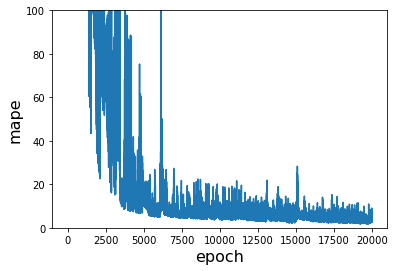

In [33]:
plt.plot(BestModel_temp.history['mape'])

plt.ylabel("mape", fontsize='16')
plt.xlabel("epoch", fontsize='16')
plt.ylim(0,100)

In [34]:
(model.predict(TrainData)-0.5)*dist_value+min_value

array([[0.00266373],
       [0.0025697 ],
       [0.00258017],
       [0.00255452],
       [0.00253639],
       [0.00245616],
       [0.00278801],
       [0.002496  ],
       [0.0025983 ],
       [0.00276812],
       [0.00260244],
       [0.00263484],
       [0.00271226],
       [0.00270314],
       [0.00255115],
       [0.00252989],
       [0.00259314],
       [0.00267023],
       [0.00252906],
       [0.00268264],
       [0.00275154],
       [0.00260129],
       [0.00270738],
       [0.00258939],
       [0.0026616 ],
       [0.00260961],
       [0.00248206],
       [0.00257404],
       [0.00266219],
       [0.00270412],
       [0.00250752],
       [0.00273494],
       [0.0027268 ],
       [0.00258954],
       [0.00272163],
       [0.00265285],
       [0.00267702],
       [0.0024617 ],
       [0.00274831],
       [0.00271054],
       [0.00247533],
       [0.00260402],
       [0.00265631],
       [0.00270935],
       [0.00271716],
       [0.00272185],
       [0.00269202],
       [0.002

In [35]:
type(TrainLabel_)

pandas.core.series.Series

In [36]:
TrainLabel_

1      0.002639
2      0.002597
3      0.002549
4      0.002536
5      0.002529
         ...   
96     0.002395
97     0.002536
98     0.002611
99     0.002535
100    0.002706
Name: P10, Length: 100, dtype: float64

In [37]:
TrainLabel_[100]

0.00270594

In [38]:
ErrorTable = np.zeros((TrainLabel.shape[0],4))
ErrorTable[:,0] = TrainLabel_
for i in range(TrainLabel.shape[0]):
    a = ((model.predict(TrainData)-0.5)*dist_value+min_value)[i]
    ErrorTable[i,1] = a
    ErrorTable[i,2] = ((TrainLabel_[i+1]-a)/TrainLabel_[i+1])*100
    ErrorTable[i,3] = np.abs(((TrainLabel_[i+1]-a)/TrainLabel_[i+1])*100)

In [39]:
ErrorTable = pd.DataFrame(ErrorTable)
ErrorTable

,0,1,2,3
0,0.002639,0.002664,-0.950532,0.950532
1,0.002597,0.002570,1.058109,1.058109
2,0.002549,0.002580,-1.241781,1.241781
3,0.002536,0.002555,-0.721324,0.721324
4,0.002529,0.002536,-0.306969,0.306969
...,...,...,...,...
95,0.002395,0.002399,-0.190289,0.190289
96,0.002536,0.002561,-0.993646,0.993646
97,0.002611,0.002610,0.036646,0.036646
98,0.002535,0.002530,0.232292,0.232292


In [40]:
np.mean(ErrorTable.iloc[:,3])

0.6405458883522078

In [41]:
ErrorTable.to_csv('D:/testoneblow/ANN_prediction5.0/P10 prediction/ErrorTable.csv')

## K fold

In [46]:
Fold = 5
FoldDataNo = int(TrainData.shape[0]/Fold)
FoldDataNo

20

In [50]:
TrainData.shape

(100, 37)

In [58]:
TrainLabel

,P10
1,1.184604
2,1.068196
3,0.931607
4,0.897109
5,0.875775
...,...
96,0.500000
97,0.896182
98,1.106091
99,0.894975


In [59]:
#Validation dataset
for i in range(Fold):
    
    temp_Valid_Data   = TrainData.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s1 = 'ValidData_Fold%d = temp_Valid_Data'%(i+1)
    exec(s1)
    
    temp_Valid_Label  = TrainLabel.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s2 = 'ValidLabel_Fold%d = temp_Valid_Label'%(i+1)
    exec(s2)

ValidData_Fold1

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.750000,373.657806,373.540253,...,377.957092,378.389252,374.274780,367.468018,360.661255,354.408600,353.307526,353.255890,353.203827,353.149994
1,354.950012,354.950012,354.950012,354.950012,354.950012,354.950012,354.949982,354.950012,358.591217,363.235382,...,361.841492,358.276031,356.407104,355.542755,354.678406,353.884430,353.622620,353.467651,353.311493,353.149994
2,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.750000,371.703918,371.645111,...,374.806030,369.079712,364.778473,361.321045,357.863647,354.687683,353.937683,353.679413,353.419159,353.149994
3,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.950012,364.489075,363.901215,...,373.390411,378.900635,376.471191,369.340302,362.209381,355.658997,354.252747,353.891174,353.526825,353.149994
4,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,367.750000,366.413361,364.708527,...,366.850708,360.800262,357.939240,356.966858,355.994476,355.101227,354.567841,354.102966,353.634521,353.149994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,361.350006,361.350006,361.350006,361.350006,361.350006,361.350006,361.350006,361.350006,363.977203,367.328064,...,369.020905,373.342651,372.303436,368.089722,363.876007,360.005310,358.033661,356.432404,354.818878,353.149994
16,368.149994,368.149994,368.149994,368.149994,368.149994,368.149994,368.149994,368.149994,370.085846,372.554901,...,384.265594,388.263214,384.660431,376.557159,368.453857,361.010223,358.348755,356.644196,354.926544,353.149994
17,385.750000,385.750000,385.750000,385.750000,385.750000,385.750000,385.750000,385.750000,385.888275,386.064636,...,374.688293,367.881531,364.467804,363.063232,361.658661,360.368439,358.663818,356.855957,355.034210,353.149994
18,357.350006,357.350006,357.350006,357.350006,357.350006,357.350006,357.350006,357.350006,358.456177,359.867096,...,379.313110,389.253113,387.453278,378.701721,369.950165,361.911041,358.978882,357.067719,355.141876,353.149994


In [60]:
#Training Dataset
for i in range(Fold):
    temp_Train_Data_Front = TrainData.iloc[:FoldDataNo*i,:]
    temp_Train_Data_Back  = TrainData.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Data_Total = np.concatenate([temp_Train_Data_Front , temp_Train_Data_Back] , axis=0)
    s1 ='TrainData_Fold%d  = temp_Train_Data_Total'%(i+1)
    exec(s1)

    temp_Train_Label_Front = TrainLabel.iloc[:FoldDataNo*i,:]
    temp_Train_Label_Back  = TrainLabel.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Label_Total = np.concatenate([temp_Train_Label_Front , temp_Train_Label_Back] , axis=0)
    s2 ='TrainLabel_Fold%d  = temp_Train_Label_Total'%(i+1)
    exec(s2)
    
TrainData_Fold1.shape , TrainLabel_Fold1.shape

((80, 37), (80, 1))

In [61]:
Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1

In [62]:
for F in range(Fold):
    s1 = 'TrainData  = TrainData_Fold%d'%(F+1)
    exec(s1)
    s2 = 'TrainLabel = TrainLabel_Fold%d'%(F+1)
    exec(s2)
    
    for M in range(1):

        Tr_result_temp = pd.read_csv('D:/testoneblow/ANN_prediction5.0/Tr_result_epoch5000.csv')
        learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
        noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
        noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
        Epoch          = 20000

        print('\n\n\nPrediction :' + Model[M])
        print('Learning rate : {:.3}'.format(learningRate))
        print('Hidden 1 neuron : %d'%(noOfNeuron1))
        print('Hidden 2 neuron : %d'%(noOfNeuron2))

    #     exec('Label_Trn = TrainLabel_%d'%(M+1))

        ################ 신경망 구조 재설계 ################

        tf.keras.backend.clear_session()
        def ANN_model(input_data):
            model = keras.Sequential()
            model.add(keras.layers.Dense(units = noOfNeuron_in,
                                         input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
            model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
            model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
            model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
            model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                          loss=keras.losses.mean_absolute_error,
                          metrics=['mse','mae','mape'])
            return model
        model = ANN_model(TrainData)

        ################ 신경망 학습 ################

        BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
        print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
              .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))

        # 모델 저장
        model.save('D:/testoneblow/ANN_prediction5.0/k-fold/BestModel_M%d_Fold%d.h5'%(M+1,F+1))

        # 히스토리 저장
        RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
        MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
        MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

        History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
        History_temp.to_csv("D:/testoneblow/ANN_prediction5.0/k-fold/BestModel_M%d_Fold%d_history.csv"%(M+1,F+1), index=None)




Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 60
Hidden 2 neuron : 30
[0 Epochs]    RMSE:170.55556,   MAE: 170.50270,  MAPE: 15898.43%
[100 Epochs]    RMSE:15.60844,   MAE: 15.34535,  MAPE: 1450.60%
[200 Epochs]    RMSE:9.06560,   MAE: 8.68158,  MAPE: 822.31%
[300 Epochs]    RMSE:2.39694,   MAE: 1.88579,  MAPE: 176.50%
[400 Epochs]    RMSE:2.53673,   MAE: 2.08139,  MAPE: 197.35%
[500 Epochs]    RMSE:2.20820,   MAE: 1.83718,  MAPE: 173.52%
[600 Epochs]    RMSE:2.04098,   MAE: 1.75951,  MAPE: 166.99%
[700 Epochs]    RMSE:12.61699,   MAE: 12.56280,  MAPE: 1173.39%
[800 Epochs]    RMSE:9.69480,   MAE: 9.61541,  MAPE: 905.46%
[900 Epochs]    RMSE:8.58286,   MAE: 8.48443,  MAPE: 784.39%
[1000 Epochs]    RMSE:6.87056,   MAE: 6.75680,  MAPE: 641.94%
[1100 Epochs]    RMSE:1.82644,   MAE: 1.45337,  MAPE: 132.17%
[1200 Epochs]    RMSE:0.98747,   MAE: 0.80905,  MAPE: 71.57%
[1300 Epochs]    RMSE:0.61946,   MAE: 0.49358,  MAPE: 46.59%
[1400 Epochs]    RMSE:7.78547,   MAE: 7.72351

[13400 Epochs]    RMSE:0.05728,   MAE: 0.04464,  MAPE: 4.38%
[13500 Epochs]    RMSE:0.10015,   MAE: 0.09016,  MAPE: 8.17%
[13600 Epochs]    RMSE:0.06985,   MAE: 0.05245,  MAPE: 5.42%
[13700 Epochs]    RMSE:0.03561,   MAE: 0.02636,  MAPE: 2.68%
[13800 Epochs]    RMSE:0.06393,   MAE: 0.05559,  MAPE: 4.93%
[13900 Epochs]    RMSE:0.15494,   MAE: 0.15009,  MAPE: 14.31%
[14000 Epochs]    RMSE:0.03955,   MAE: 0.02933,  MAPE: 2.90%
[14100 Epochs]    RMSE:0.17799,   MAE: 0.17195,  MAPE: 16.40%
[14200 Epochs]    RMSE:0.09176,   MAE: 0.06833,  MAPE: 6.58%
[14300 Epochs]    RMSE:0.09330,   MAE: 0.08234,  MAPE: 7.44%
[14400 Epochs]    RMSE:0.06682,   MAE: 0.04961,  MAPE: 5.00%
[14500 Epochs]    RMSE:0.07823,   MAE: 0.05947,  MAPE: 5.83%
[14600 Epochs]    RMSE:0.08883,   MAE: 0.07830,  MAPE: 7.73%
[14700 Epochs]    RMSE:0.04033,   MAE: 0.03019,  MAPE: 2.98%
[14800 Epochs]    RMSE:0.15786,   MAE: 0.14828,  MAPE: 13.05%
[14900 Epochs]    RMSE:0.10480,   MAE: 0.08048,  MAPE: 8.51%
[15000 Epochs]    RMS

[6600 Epochs]    RMSE:0.21904,   MAE: 0.19981,  MAPE: 18.14%
[6700 Epochs]    RMSE:0.09365,   MAE: 0.07705,  MAPE: 7.93%
[6800 Epochs]    RMSE:0.13804,   MAE: 0.11535,  MAPE: 10.58%
[6900 Epochs]    RMSE:0.07338,   MAE: 0.05683,  MAPE: 5.66%
[7000 Epochs]    RMSE:0.06399,   MAE: 0.04969,  MAPE: 5.02%
[7100 Epochs]    RMSE:0.16213,   MAE: 0.14223,  MAPE: 12.95%
[7200 Epochs]    RMSE:0.09011,   MAE: 0.06644,  MAPE: 6.89%
[7300 Epochs]    RMSE:0.13852,   MAE: 0.12227,  MAPE: 11.41%
[7400 Epochs]    RMSE:0.13615,   MAE: 0.12020,  MAPE: 12.14%
[7500 Epochs]    RMSE:0.06999,   MAE: 0.05474,  MAPE: 5.09%
[7600 Epochs]    RMSE:0.08144,   MAE: 0.06476,  MAPE: 6.92%
[7700 Epochs]    RMSE:0.06674,   MAE: 0.05267,  MAPE: 5.15%
[7800 Epochs]    RMSE:0.24640,   MAE: 0.19744,  MAPE: 20.42%
[7900 Epochs]    RMSE:0.08170,   MAE: 0.06597,  MAPE: 6.58%
[8000 Epochs]    RMSE:0.06220,   MAE: 0.04823,  MAPE: 4.83%
[8100 Epochs]    RMSE:0.07805,   MAE: 0.05530,  MAPE: 5.10%
[8200 Epochs]    RMSE:0.06731,   M

[0 Epochs]    RMSE:181.82441,   MAE: 181.79935,  MAPE: 16842.93%
[100 Epochs]    RMSE:1.33981,   MAE: 1.07920,  MAPE: 101.66%
[200 Epochs]    RMSE:1.03219,   MAE: 0.83809,  MAPE: 78.70%
[300 Epochs]    RMSE:3.62686,   MAE: 3.54020,  MAPE: 329.59%
[400 Epochs]    RMSE:1.51248,   MAE: 1.33133,  MAPE: 123.80%
[500 Epochs]    RMSE:1.23921,   MAE: 1.07341,  MAPE: 100.39%
[600 Epochs]    RMSE:1.62167,   MAE: 1.50901,  MAPE: 137.73%
[700 Epochs]    RMSE:2.87183,   MAE: 2.80290,  MAPE: 259.87%
[800 Epochs]    RMSE:2.50790,   MAE: 2.42231,  MAPE: 225.87%
[900 Epochs]    RMSE:2.00663,   MAE: 1.89301,  MAPE: 177.56%
[1000 Epochs]    RMSE:1.90044,   MAE: 1.78117,  MAPE: 167.37%
[1100 Epochs]    RMSE:0.89878,   MAE: 0.72797,  MAPE: 65.43%
[1200 Epochs]    RMSE:0.54828,   MAE: 0.46101,  MAPE: 41.65%
[1300 Epochs]    RMSE:1.28435,   MAE: 1.23438,  MAPE: 114.81%
[1400 Epochs]    RMSE:0.57587,   MAE: 0.46015,  MAPE: 43.18%
[1500 Epochs]    RMSE:5.37572,   MAE: 5.36361,  MAPE: 495.93%
[1600 Epochs]    R

[13600 Epochs]    RMSE:0.12178,   MAE: 0.10976,  MAPE: 10.88%
[13700 Epochs]    RMSE:0.05560,   MAE: 0.04297,  MAPE: 4.01%
[13800 Epochs]    RMSE:0.04994,   MAE: 0.03845,  MAPE: 3.51%
[13900 Epochs]    RMSE:0.07280,   MAE: 0.05861,  MAPE: 5.91%
[14000 Epochs]    RMSE:0.08922,   MAE: 0.07691,  MAPE: 6.39%
[14100 Epochs]    RMSE:0.08409,   MAE: 0.07129,  MAPE: 6.82%
[14200 Epochs]    RMSE:0.06221,   MAE: 0.04704,  MAPE: 4.87%
[14300 Epochs]    RMSE:0.07991,   MAE: 0.06021,  MAPE: 6.25%
[14400 Epochs]    RMSE:0.07927,   MAE: 0.07011,  MAPE: 6.07%
[14500 Epochs]    RMSE:0.07256,   MAE: 0.06326,  MAPE: 5.60%
[14600 Epochs]    RMSE:0.05457,   MAE: 0.04422,  MAPE: 4.07%
[14700 Epochs]    RMSE:0.08621,   MAE: 0.06744,  MAPE: 7.19%
[14800 Epochs]    RMSE:0.05989,   MAE: 0.04666,  MAPE: 4.76%
[14900 Epochs]    RMSE:0.05370,   MAE: 0.04039,  MAPE: 4.13%
[15000 Epochs]    RMSE:0.05193,   MAE: 0.04322,  MAPE: 3.61%
[15100 Epochs]    RMSE:0.07934,   MAE: 0.06939,  MAPE: 6.44%
[15200 Epochs]    RMSE:

[6800 Epochs]    RMSE:0.06453,   MAE: 0.04785,  MAPE: 4.53%
[6900 Epochs]    RMSE:0.10298,   MAE: 0.09048,  MAPE: 8.95%
[7000 Epochs]    RMSE:0.05511,   MAE: 0.04018,  MAPE: 3.89%
[7100 Epochs]    RMSE:0.14187,   MAE: 0.12642,  MAPE: 11.79%
[7200 Epochs]    RMSE:0.05577,   MAE: 0.04498,  MAPE: 4.49%
[7300 Epochs]    RMSE:0.08438,   MAE: 0.07219,  MAPE: 6.79%
[7400 Epochs]    RMSE:0.12090,   MAE: 0.10653,  MAPE: 10.40%
[7500 Epochs]    RMSE:0.11639,   MAE: 0.10235,  MAPE: 9.62%
[7600 Epochs]    RMSE:0.12556,   MAE: 0.11007,  MAPE: 10.47%
[7700 Epochs]    RMSE:0.10755,   MAE: 0.08422,  MAPE: 8.94%
[7800 Epochs]    RMSE:0.07789,   MAE: 0.05870,  MAPE: 5.55%
[7900 Epochs]    RMSE:0.10793,   MAE: 0.09200,  MAPE: 9.37%
[8000 Epochs]    RMSE:0.07686,   MAE: 0.06249,  MAPE: 5.94%
[8100 Epochs]    RMSE:0.09419,   MAE: 0.07195,  MAPE: 7.36%
[8200 Epochs]    RMSE:0.06468,   MAE: 0.04744,  MAPE: 5.13%
[8300 Epochs]    RMSE:0.08224,   MAE: 0.06010,  MAPE: 5.82%
[8400 Epochs]    RMSE:0.08376,   MAE:

[200 Epochs]    RMSE:3.96354,   MAE: 3.68345,  MAPE: 346.37%
[300 Epochs]    RMSE:2.65271,   MAE: 2.43230,  MAPE: 227.65%
[400 Epochs]    RMSE:5.35906,   MAE: 5.26516,  MAPE: 491.52%
[500 Epochs]    RMSE:4.82048,   MAE: 4.72504,  MAPE: 447.40%
[600 Epochs]    RMSE:2.03930,   MAE: 1.82291,  MAPE: 167.34%
[700 Epochs]    RMSE:2.54447,   MAE: 2.40531,  MAPE: 222.63%
[800 Epochs]    RMSE:2.68304,   MAE: 2.57238,  MAPE: 244.88%
[900 Epochs]    RMSE:0.53354,   MAE: 0.45981,  MAPE: 43.54%
[1000 Epochs]    RMSE:0.95706,   MAE: 0.91574,  MAPE: 85.71%
[1100 Epochs]    RMSE:1.76007,   MAE: 1.70569,  MAPE: 160.99%
[1200 Epochs]    RMSE:1.77272,   MAE: 1.71380,  MAPE: 160.15%
[1300 Epochs]    RMSE:0.95235,   MAE: 0.93143,  MAPE: 88.64%
[1400 Epochs]    RMSE:1.01228,   MAE: 0.99829,  MAPE: 91.69%
[1500 Epochs]    RMSE:0.60058,   MAE: 0.55675,  MAPE: 51.59%
[1600 Epochs]    RMSE:0.84640,   MAE: 0.80372,  MAPE: 74.63%
[1700 Epochs]    RMSE:1.79587,   MAE: 1.73527,  MAPE: 157.52%
[1800 Epochs]    RMSE:

[13800 Epochs]    RMSE:0.07218,   MAE: 0.06018,  MAPE: 5.77%
[13900 Epochs]    RMSE:0.08269,   MAE: 0.06904,  MAPE: 7.16%
[14000 Epochs]    RMSE:0.06920,   MAE: 0.04821,  MAPE: 4.84%
[14100 Epochs]    RMSE:0.08067,   MAE: 0.07140,  MAPE: 6.52%
[14200 Epochs]    RMSE:0.05237,   MAE: 0.03958,  MAPE: 3.73%
[14300 Epochs]    RMSE:0.04797,   MAE: 0.04001,  MAPE: 3.78%
[14400 Epochs]    RMSE:0.03503,   MAE: 0.02713,  MAPE: 2.67%
[14500 Epochs]    RMSE:0.11956,   MAE: 0.09775,  MAPE: 10.18%
[14600 Epochs]    RMSE:0.03074,   MAE: 0.02345,  MAPE: 2.21%
[14700 Epochs]    RMSE:0.04184,   MAE: 0.03127,  MAPE: 3.15%
[14800 Epochs]    RMSE:0.05079,   MAE: 0.03896,  MAPE: 3.84%
[14900 Epochs]    RMSE:0.10848,   MAE: 0.08943,  MAPE: 8.47%
[15000 Epochs]    RMSE:0.06398,   MAE: 0.05398,  MAPE: 5.31%
[15100 Epochs]    RMSE:0.06812,   MAE: 0.05554,  MAPE: 4.93%
[15200 Epochs]    RMSE:0.05971,   MAE: 0.05248,  MAPE: 4.80%
[15300 Epochs]    RMSE:0.04026,   MAE: 0.03331,  MAPE: 3.16%
[15400 Epochs]    RMSE:

In [63]:
for F in range(Fold):
    s = "Model_Fold%d = keras.models.load_model('D:/testoneblow/ANN_prediction5.0/k-fold/BestModel_M1_Fold%d.h5')"%(F+1,F+1)
    exec(s)
    

In [64]:
for F in range (Fold):
    s1 = "real = ((ValidLabel_Fold%d)-0.5)*dist_value+min_value"%(F+1)
    exec(s1)
    s2 = "predict = (Model_Fold%d.predict(ValidData_Fold%d)-0.5)*dist_value+min_value"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [65]:
Error = pd.DataFrame(((Result_Fold1.iloc[:,0]-Result_Fold1.iloc[:,1])/Result_Fold1.iloc[:,0])*100)
absError = np.abs(Error)
Result1 = pd.DataFrame(np.concatenate((Result_Fold1,Error,absError),axis = 1))
Result1

,0,1,2,3
0,0.002639,0.002619,0.737864,0.737864
1,0.002597,0.002574,0.908095,0.908095
2,0.002549,0.002517,1.226881,1.226881
3,0.002536,0.002518,0.708627,0.708627
4,0.002529,0.002554,-0.987072,0.987072
...,...,...,...,...
15,0.002557,0.002559,-0.077098,0.077098
16,0.002570,0.002587,-0.646595,0.646595
17,0.002674,0.002674,-0.012610,0.012610
18,0.002518,0.002553,-1.419007,1.419007


In [66]:
for F in range (Fold):
    exec("MAE = pd.DataFrame(np.abs(Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1]))"%(F+1,F+1))
    s1 = 'Error = pd.DataFrame(((Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1])/Result_Fold%d.iloc[:,0])*100)'%(F+1,F+1,F+1)
    exec(s1)
    s2 = 'Result%d = pd.DataFrame(np.concatenate((Result_Fold%d,Error,np.abs(Error),MAE),axis = 1))'%(F+1,F+1)
    exec(s2)
    s3 = "Result%d.to_csv('D:/testoneblow/ANN_prediction5.0/k-fold/Result%d.csv')"%(F+1,F+1)
    exec(s3)

In [67]:
Result1

,0,1,2,3,4
0,0.002639,0.002619,0.737864,0.737864,1.946964e-05
1,0.002597,0.002574,0.908095,0.908095,2.358485e-05
2,0.002549,0.002517,1.226881,1.226881,3.126731e-05
3,0.002536,0.002518,0.708627,0.708627,1.797241e-05
4,0.002529,0.002554,-0.987072,0.987072,2.495941e-05
...,...,...,...,...,...
15,0.002557,0.002559,-0.077098,0.077098,1.971571e-06
16,0.002570,0.002587,-0.646595,0.646595,1.661677e-05
17,0.002674,0.002674,-0.012610,0.012610,3.371234e-07
18,0.002518,0.002553,-1.419007,1.419007,3.572491e-05


In [68]:
average_Error_Fold = []
Max_Error_Fold = []
for F in range(Fold):
    exec("a = np.mean(Result%d.iloc[:,3])"%(F+1))
    average_Error_Fold = np.append(average_Error_Fold,a)
    exec("b = np.max(Result%d.iloc[:,3])"%(F+1))
    Max_Error_Fold = np.append(Max_Error_Fold,b)

In [69]:
average_Error_Fold

array([0.83891537, 1.06890633, 0.5911853 , 0.50649926, 1.02988992])

In [70]:
average_Error = np.mean(average_Error_Fold)
average_Error

0.8070792381662617

In [71]:
Max_Error_Fold

array([1.74860354, 3.71573225, 1.70588913, 1.84816508, 3.55075694])